In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('ER-2024.xlsx')

In [7]:
df.head()

,Codigo,Cuenta,2024,2023,2022
0,705000000,PRESTACIONES DE SERVICIOS,52303.00,134308.50,144997.97
1,705000001,CERTIFICADOS DIGITALES,1560.00,2250.50,1641.00
2,705000002,"RENTAS, IRNR Y 720",5626.50,2500.76,6250.00
3,778000000,INGRESOS EXCEPCIONALES,8459.79,2705.86,1336.81
4,746000000,"SUBVENCIONES, DONACIONES Y LEG",2750.00,3030.00,750.00


In [9]:
# Añadir una columna para identificar si es ingreso o egreso
df['Tipo'] = df['Codigo'].apply(lambda x: 'Ingreso' if str(x).startswith('7') else 'Egreso')

# Mostrar el dataset con la nueva columna
df.head()

,Codigo,Cuenta,2024,2023,2022,Tipo
0,705000000,PRESTACIONES DE SERVICIOS,52303.00,134308.50,144997.97,Ingreso
1,705000001,CERTIFICADOS DIGITALES,1560.00,2250.50,1641.00,Ingreso
2,705000002,"RENTAS, IRNR Y 720",5626.50,2500.76,6250.00,Ingreso
3,778000000,INGRESOS EXCEPCIONALES,8459.79,2705.86,1336.81,Ingreso
4,746000000,"SUBVENCIONES, DONACIONES Y LEG",2750.00,3030.00,750.00,Ingreso


In [11]:
print("Columnas originales:", df.columns)

Columnas originales: Index(['Codigo', 'Cuenta', 2024, 2023, 2022, 'Tipo'], dtype='object')


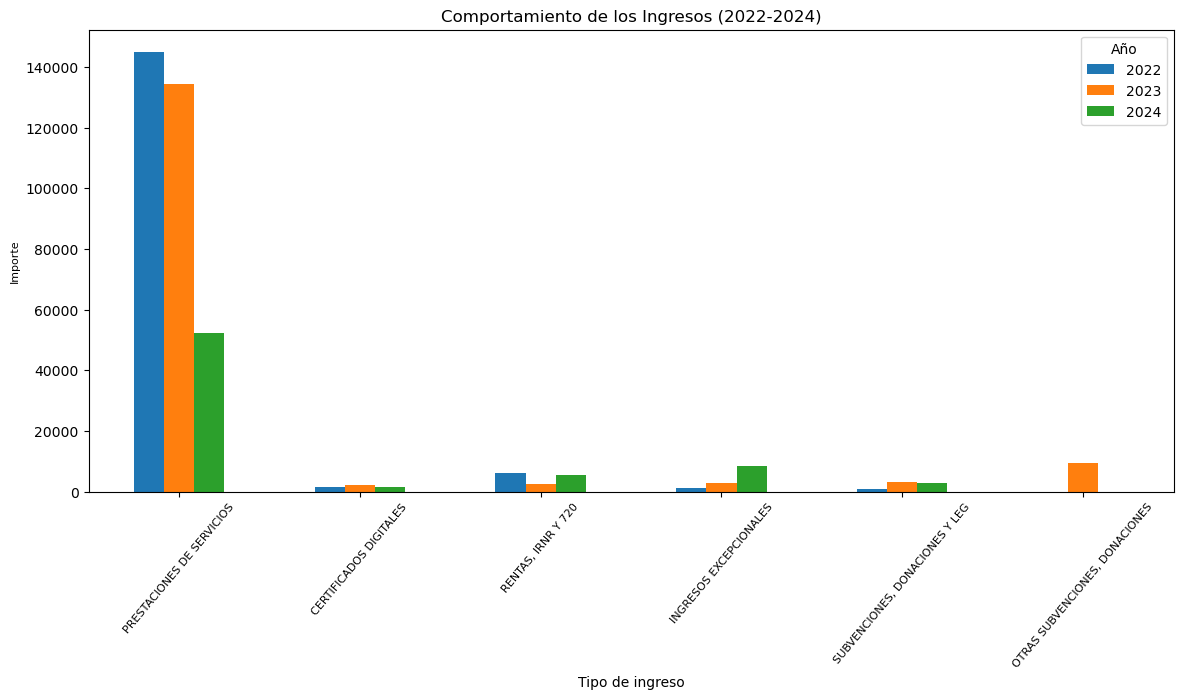

In [15]:
# Filtrar los ingresos
ingresos = df[df['Tipo'] == 'Ingreso']

# Gráfico de barras agrupadas para el comportamiento de los ingresos a lo largo de los años
ingresos.set_index('Cuenta')[[2022, 2023, 2024]].plot(kind='bar', figsize=(14, 6))
plt.xlabel('Tipo de ingreso', fontsize=10)
plt.ylabel('Importe', fontsize=8)
plt.title('Comportamiento de los Ingresos (2022-2024)')
plt.xticks(rotation=50, fontsize=8)
plt.legend(title='Año')
plt.show()

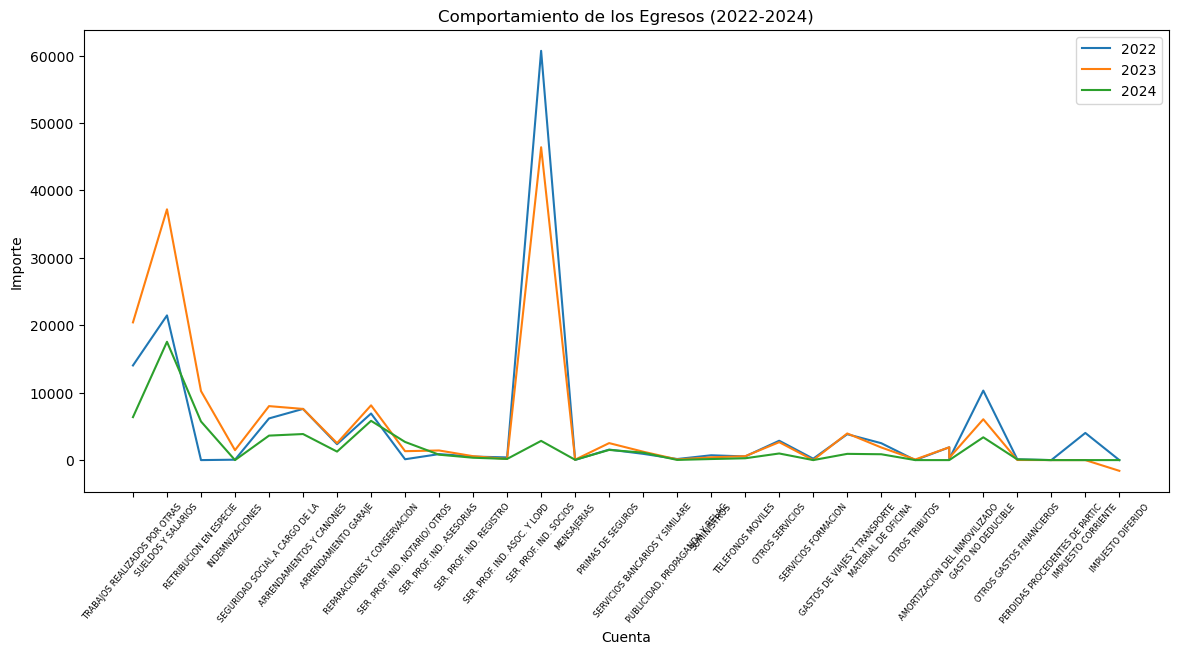

In [17]:
# Filtrar los egresos
egresos = df[df['Tipo'] == 'Egreso']

# Gráfico del comportamiento de los egresos a lo largo de los años
plt.figure(figsize=(14, 6))
plt.plot(egresos['Cuenta'], egresos[2022], label='2022')
plt.plot(egresos['Cuenta'], egresos[2023], label='2023')
plt.plot(egresos['Cuenta'], egresos[2024], label='2024')
plt.xlabel('Cuenta')
plt.ylabel('Importe')
plt.title('Comportamiento de los Egresos (2022-2024)')
plt.legend()
plt.xticks(rotation=50, fontsize=6)
plt.show()

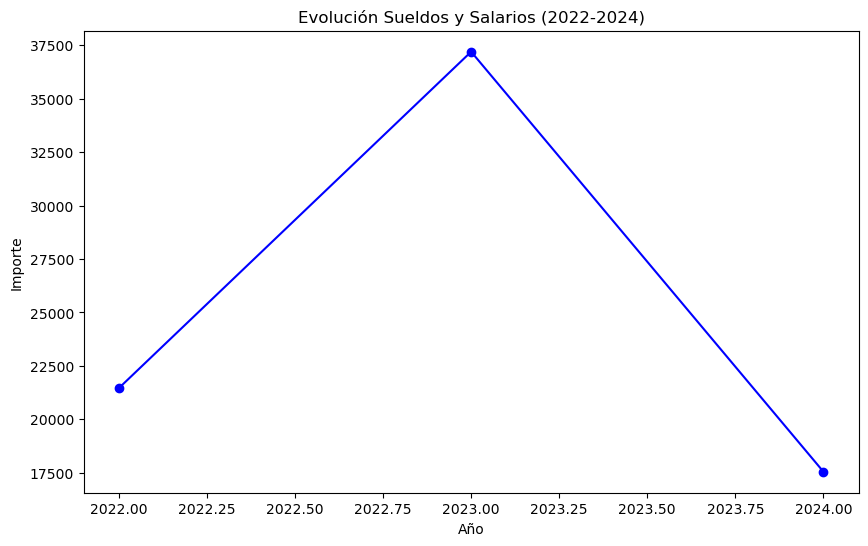

In [94]:
# Filtrar la cuenta de Sueldos
sueldos = egresos[egresos['Cuenta'] == 'SUELDOS Y SALARIOS']

# Gráfico de la evolución de Sueldos
plt.figure(figsize=(10, 6))
plt.plot([2022, 2023, 2024], [sueldos[2022].values[0], sueldos[2023].values[0], sueldos[2024].values[0]], marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('Importe')
plt.title('Evolución Sueldos y Salarios (2022-2024)')
plt.show()

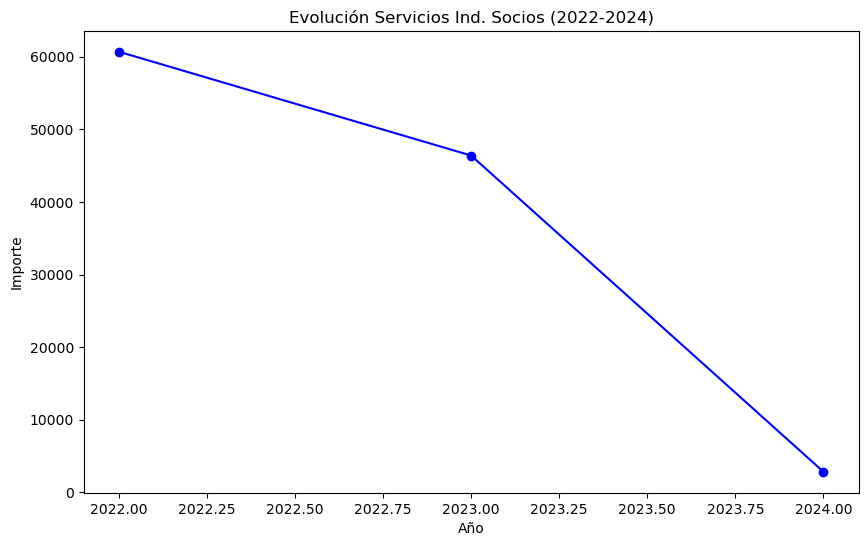

In [92]:
# Filtrar la cuenta de Sueldos
ser_prof_soc = egresos[egresos['Cuenta'] == 'SER. PROF. IND. SOCIOS']

# Gráfico de la evolución de Sueldos
plt.figure(figsize=(10, 6))
plt.plot([2022, 2023, 2024], [ser_prof_soc[2022].values[0], ser_prof_soc[2023].values[0], ser_prof_soc[2024].values[0]], 
         marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('Importe')
plt.title('Evolución Servicios Ind. Socios (2022-2024)')
plt.show()

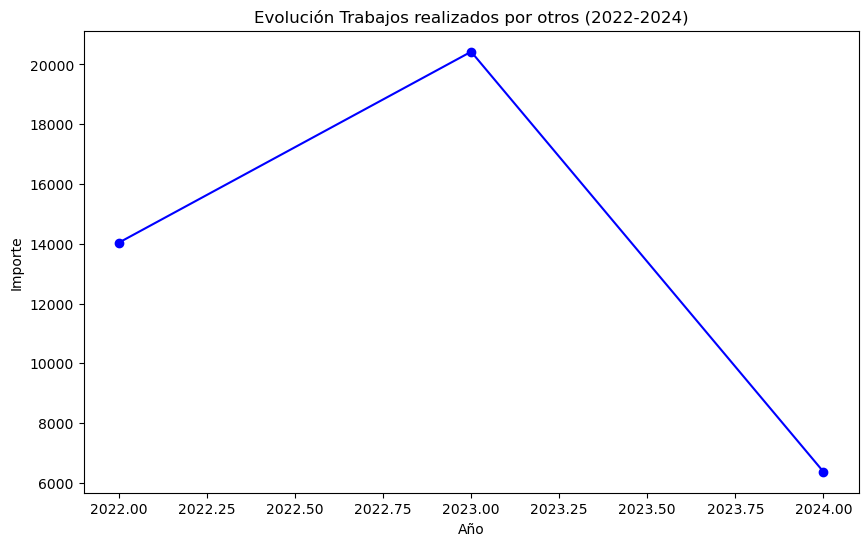

In [90]:
# Filtrar la cuenta de Sueldos
trab_real_otras_per = egresos[egresos['Cuenta'] == 'TRABAJOS REALIZADOS POR OTRAS']

# Gráfico de la evolución de Sueldos
plt.figure(figsize=(10, 6))
plt.plot([2022, 2023, 2024], [trab_real_otras_per[2022].values[0], trab_real_otras_per[2023].values[0], trab_real_otras_per[2024].values[0]], 
         marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('Importe')
plt.title('Evolución Trabajos realizados por otros (2022-2024)')
plt.show()

In [21]:
# Por ejemplo, ratio de ingresos/egresos por año
ratio_2022 = ingresos[2022].sum() / egresos[2022].sum()
ratio_2023 = ingresos[2023].sum() / egresos[2023].sum()
ratio_2024 = ingresos[2024].sum() / egresos[2024].sum()

print(f"Ratio Ingresos/Egresos 2022: {ratio_2022:.2f}")
print(f"Ratio Ingresos/Egresos 2023: {ratio_2023:.2f}")
print(f"Ratio Ingresos/Egresos 2024: {ratio_2024:.2f}")

Ratio Ingresos/Egresos 2022: 1.03
Ratio Ingresos/Egresos 2023: 0.93
Ratio Ingresos/Egresos 2024: 1.17


In [23]:
ratios = {
    2022: ratio_2022,
    2023: ratio_2023,
    2024: ratio_2024
}

# Convertir a DataFrame para facilidad de graficación
ratios_df = pd.DataFrame(list(ratios.items()), columns=['Año', 'Ratio'])
ratios_df

,Año,Ratio
0,2022,1.025474
1,2023,0.931280
2,2024,1.169368


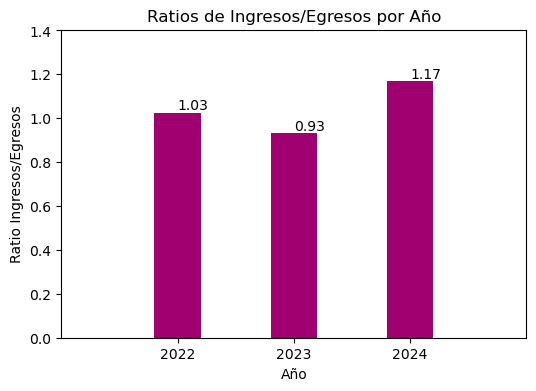

In [116]:
# Gráfico de barras con anotaciones para los ratios de ingresos/egresos por año
plt.figure(figsize=(6, 4))
bars = plt.bar(ratios_df['Año'], ratios_df['Ratio'], color="#A00070", width=0.4)
plt.xlabel('Año')
plt.ylabel('Ratio Ingresos/Egresos')
plt.title('Ratios de Ingresos/Egresos por Año')
plt.ylim(0, max(ratios_df['Ratio']) * 1.2)  # Ajustar el límite del eje y
plt.xticks(ratios_df['Año'])
plt.xlim(min(ratios_df['Año']) - 1, max(ratios_df['Año']) + 1)
# Añadir anotaciones en la parte superior de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.show()

In [27]:
# Por ejemplo, ratio de ingresos/egresos por año
beneficio_2022 = ingresos[2022].sum() - egresos[2022].sum()
beneficio_2023 = ingresos[2023].sum() - egresos[2023].sum()
beneficio_2024 = ingresos[2024].sum() - egresos[2024].sum()

print(f"Beneficio 2022: {beneficio_2022:.2f}")
print(f"Beneficio 2023: {beneficio_2023:.2f}")
print(f"Beneficio 2024: {beneficio_2024:.2f}")

Beneficio 2022: 3849.79
Beneficio 2023: -11385.63
Beneficio 2024: 10239.88


In [29]:
beneficio = {
    2022: beneficio_2022,
    2023: 0,
    2024: beneficio_2024
}

# Convertir a DataFrame para facilidad de graficación
beneficio_df = pd.DataFrame(list(beneficio.items()), columns=['Año', 'Beneficio'])
beneficio_df

,Año,Beneficio
0,2022,3849.79
1,2023,0.00
2,2024,10239.88


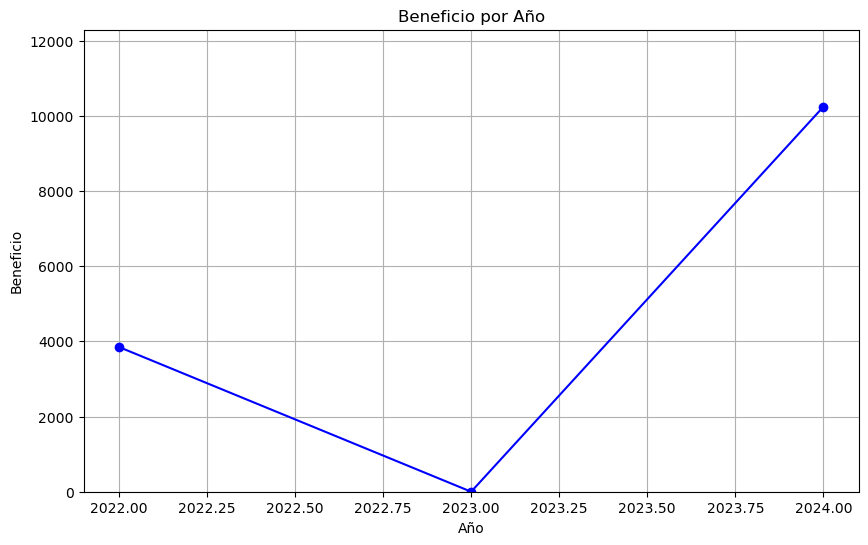

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(beneficio_df['Año'], beneficio_df['Beneficio'], marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('Beneficio')
plt.title('Beneficio por Año')
plt.ylim(0, max(beneficio_df['Beneficio']) * 1.2)  # Ajustar el límite del eje y
plt.grid(True)
plt.show()

In [72]:
top_5_gastos_2024 = egresos.groupby("Cuenta")[2024].sum()
top_5_gastos_2024.sort_values(ascending=False, inplace=True)
top_5_gastos_2024.head(5)

Cuenta
SUELDOS Y SALARIOS               17548.43
TRABAJOS REALIZADOS POR OTRAS     6371.79
REPARACIONES Y CONSERVACION       5823.73
RETRIBUCION EN ESPECIE            5728.24
ARRENDAMIENTOS Y CANONES          3864.00
Name: 2024, dtype: float64

In [80]:
top_5_gastos_2023 = egresos.groupby("Cuenta")[2023].sum()
top_5_gastos_2023.sort_values(ascending=False, inplace=True)
top_5_gastos_2023.head(5)

Cuenta
SER. PROF. IND. SOCIOS           46400.00
SUELDOS Y SALARIOS               37194.25
TRABAJOS REALIZADOS POR OTRAS    20425.62
RETRIBUCION EN ESPECIE           10237.82
REPARACIONES Y CONSERVACION       8122.59
Name: 2023, dtype: float64

In [82]:
top_5_gastos_2022 = egresos.groupby("Cuenta")[2022].sum()
top_5_gastos_2022.sort_values(ascending=False, inplace=True)
top_5_gastos_2022.head(5)

Cuenta
SER. PROF. IND. SOCIOS           60700.00
SUELDOS Y SALARIOS               21459.74
TRABAJOS REALIZADOS POR OTRAS    14037.49
GASTO NO DEDUCIBLE               10309.59
ARRENDAMIENTOS Y CANONES          7593.16
Name: 2022, dtype: float64

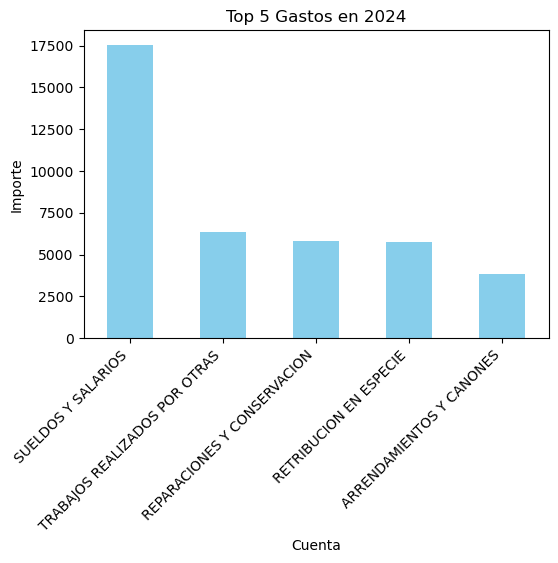

In [74]:
# Graficar usando Matplotlib
plt.figure(figsize=(6, 4))
top_5_gastos_2024.head(5).plot(kind='bar', color='skyblue')
plt.xlabel('Cuenta')
plt.ylabel('Importe')
plt.title('Top 5 Gastos en 2024')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotar y ajustar el tamaño de la fuente
plt.show()

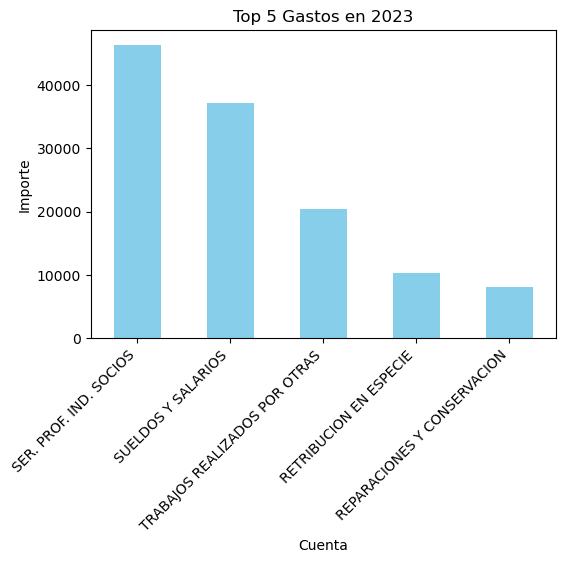

In [84]:
# Graficar usando Matplotlib
plt.figure(figsize=(6, 4))
top_5_gastos_2023.head(5).plot(kind='bar', color='skyblue')
plt.xlabel('Cuenta')
plt.ylabel('Importe')
plt.title('Top 5 Gastos en 2023')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotar y ajustar el tamaño de la fuente
plt.show()

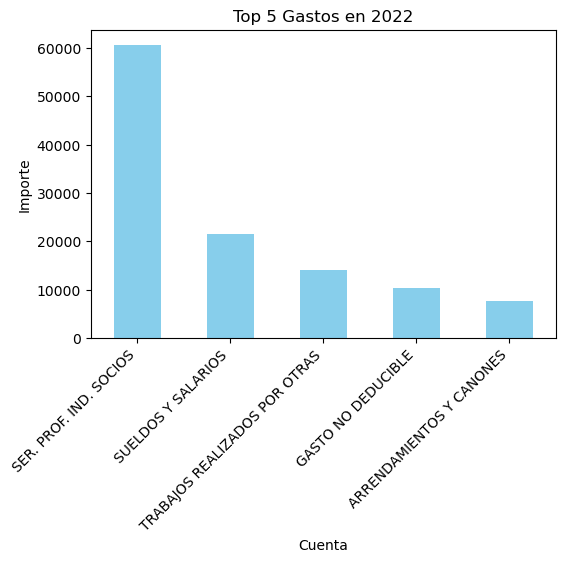

In [86]:
# Graficar usando Matplotlib
plt.figure(figsize=(6, 4))
top_5_gastos_2022.head(5).plot(kind='bar', color='skyblue')
plt.xlabel('Cuenta')
plt.ylabel('Importe')
plt.title('Top 5 Gastos en 2022')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotar y ajustar el tamaño de la fuente
plt.show()